<a href="https://colab.research.google.com/github/GrantPennington/CS430_Assignment4_GTP/blob/main/Assignment4_GTP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import Dataset

In [2]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment 4/Live.csv')

## Analyze the dataset

In [3]:
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [4]:
data.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

## Preprocessing

I will create clusters using columns num_reactions and num_likes
<br />I will drop all of the other columns

In [6]:
data.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')

In [7]:
X=data.drop(['status_id', 'status_type', 'status_published',
       'num_comments', 'num_shares', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'], axis=1)

In [8]:
X

,num_reactions,num_likes
0,529,432
1,150,150
2,227,204
3,111,111
4,213,204
...,...,...
7045,89,89
7046,16,14
7047,2,1
7048,351,349


## KMeans

In [9]:
from sklearn.cluster import KMeans

### Find K using Elbow and Silhouette

### Elbow Method

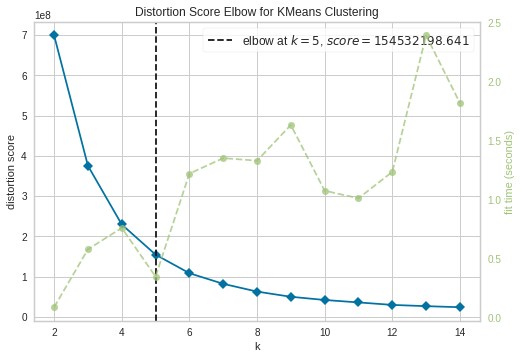

In [10]:
from yellowbrick.cluster import KElbowVisualizer
KM=KMeans(random_state=0)
visualizer = KElbowVisualizer(KM, k=(2,15))
visualizer.fit(X)
visualizer.show()
plt.show()

### Silhouette Coefficient


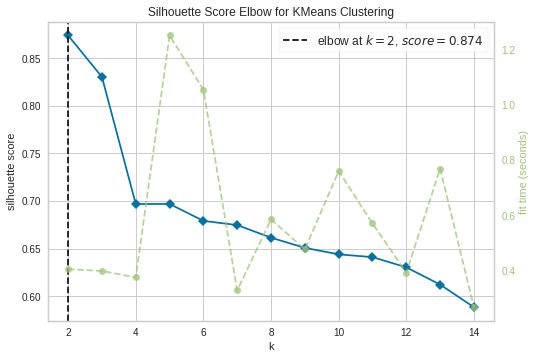

In [11]:
KM=KMeans(random_state = 0)
visualizer_sil = KElbowVisualizer(KM, k = (2,15), metric = 'silhouette')
visualizer_sil.fit(X)
visualizer_sil.show()
plt.show()

### I will choose k=2
- Elbow gives k = 5
- Silhouette gives k = 2

## Create Cluster

In [21]:
KM=KMeans(n_clusters=2, random_state=0)
y_pred=KM.fit_predict(X)
X['cluster']=y_pred
X.head()

,num_reactions,num_likes,cluster
0,529,432,0
1,150,150,0
2,227,204,0
3,111,111,0
4,213,204,0


In [22]:
KM.cluster_centers_

array([[1.18791883e+02, 1.07414861e+02, 6.31217577e-01],
       [1.70113710e+03, 1.63721169e+03, 1.63508065e+00]])

### Plot KMeans Clusters

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


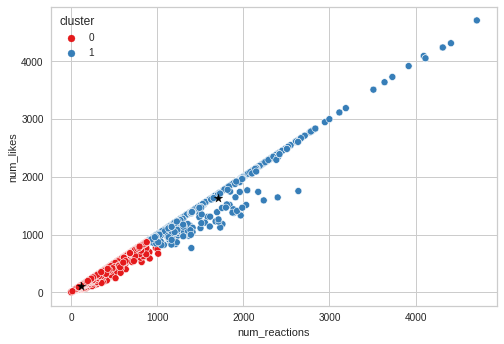

In [23]:
import seaborn as sns
sns.scatterplot('num_reactions', 'num_likes', data=X, hue=X['cluster'], palette='Set1', legend='full')
plt.scatter(KM.cluster_centers_[:,0], KM.cluster_centers_[:,1], marker='*', s=80, c='black')

## DBScan

In [18]:
from sklearn.cluster import DBSCAN
cluster=DBSCAN(eps=2, min_samples=4).fit(X)

In [19]:
cluster.labels_

array([-1,  0, -1, ...,  1, 31,  1])

### Plot DBScan Clusters

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


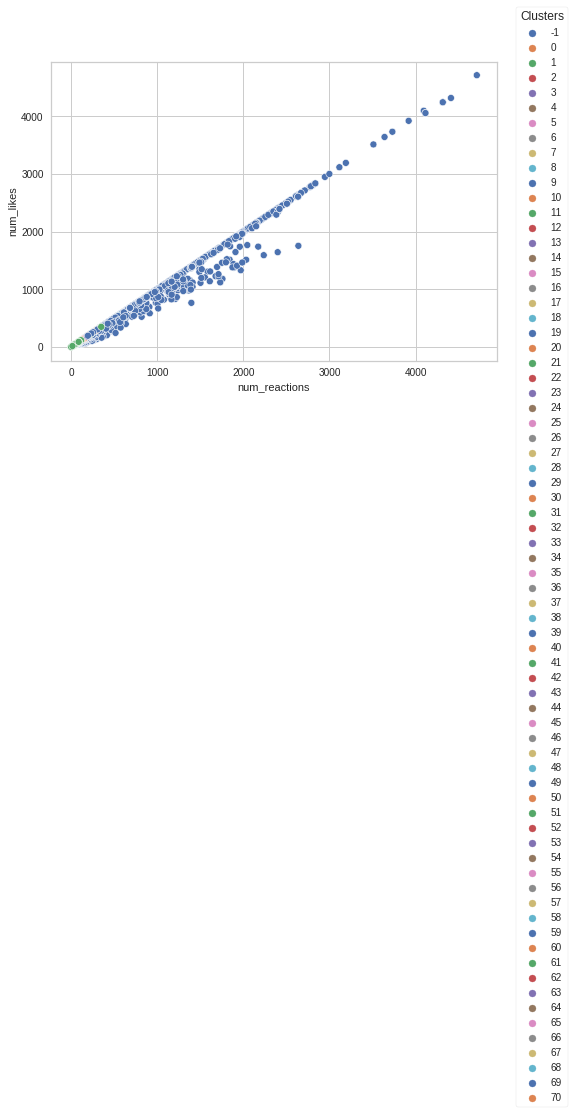

In [20]:
p=sns.scatterplot('num_reactions', 'num_likes', data=X, hue=cluster.labels_, legend='full', palette='deep')
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title="Clusters")